In [1]:
import os
import sys
from pathlib import Path

if "__file__" in globals():
    sys.path.append(str((Path(__file__).parent / "..").resolve()))
else:
    sys.path.append(str(Path(os.getcwd(), "..").resolve()))
import math

import numpy as np

from dezero.core_simple import Function, Variable
from dezero.utils import plot_dot_graph

In [2]:
class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

In [3]:
def sin(x: Variable) -> Variable:
    return Sin()(x)

In [4]:
x = Variable(np.array(np.pi / 4))
y = sin(x)
y.backward()
print("--- original sin ---")
print(y.data)
print(x.grad)

--- original sin ---
0.7071067811865475
0.7071067811865476


In [5]:
def my_sin(x: Variable, threshold=0.0001) -> Variable:
    """テイラー展開でsinを求める"""
    y = 0
    for i in range(100000):
        c: int = (-1) ** i / math.factorial(2 * i + 1)
        # i回目に追加する項
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

In [6]:
x = Variable(np.array(np.pi / 4))
y = my_sin(x)  # , threshold=1e-150)
y.backward()
print("--- approximate sin ---")
print(y.data)
print(x.grad)

--- approximate sin ---
0.7071064695751781
0.7071032148228457


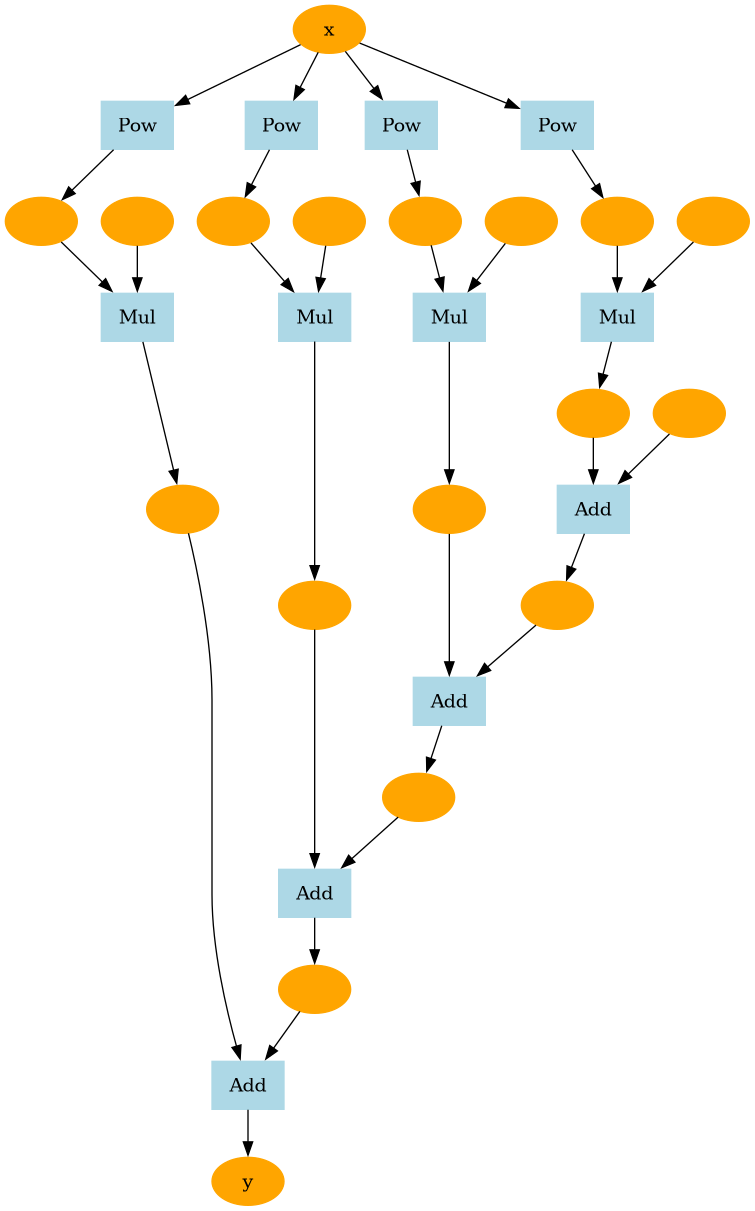

In [7]:
x.name = "x"
y.name = "y"
plot_dot_graph(y, verbose=False, to_file="my_sin.png")

`threshold` を変えることで計算グラフの複雑さを変えることができる。

if・for文で計算グラフの複雑さを定義できる。Define-by-Runの使いやすさ。